In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
# venv/Scripts/Activate.ps1

In [2]:
# Generamos el Data Frame leyendo el archivo csv
df = pd.read_csv("tabla_de_hechos.csv", usecols=['anio', 'pais', 'Remittance inflows (US$ million)'])
df.rename(columns = {'Remittance inflows (US$ million)' : 'remittance'}, inplace = True)
df.sample(10)

,anio,pais,remittance
23,2013,China,59491.287194
36,2015,Philippines,29799.395700
54,2022,France,30044.437807
27,2017,China,63875.674112
3,2015,India,68909.693353
35,2014,Philippines,28690.797896
0,2012,India,68820.517838
53,2021,France,32077.312215
45,2013,France,24412.282153
22,2012,China,57986.598422


---

### Predicción

Para generar la línea, usamos un modelo de *regresión lineal* entre "Ventas" y "timeIndex".

Como la tendencia presenta una dinámica no lineal, incluimos un **término cuadrático** al modelo.

El módulo `statmodels` nos permite ajustar modelos con su API, usando fórmulas estilo R.

La sentencia:
   `smf.ols(formula='Ventas ~ timeIndex', data = df_train).fit()`

Nos indica que haremos regresión lineal `ols` (ordinary least squares), con dos variables (`formula`).

Para mas detalles,  [ver aquí](http://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html).

In [3]:
# Seleccionamos el país
df_ind = df[df["pais"] == "India"]

# Reseteamos el índice para no tener problemas de indexación
df_ind = df_ind.reset_index()
df_ind.drop("index", axis=1, inplace=True)

# cargamos los años a predecir con valores NaN
df_ind.loc[len(df_ind.index)] = [2023, 'India', np.nan]
df_ind.loc[len(df_ind.index)] = [2024, 'India', np.nan]
df_ind.loc[len(df_ind.index)] = [2025, 'India', np.nan]

# Establecemos el año como índice
df_ind.set_index("anio", inplace=True)

# Insertamos la columna time index para la predicción
df_ind.insert(0, "time_index", value=np.arange(len(df_ind)))
df_ind["time_index"] += df_ind["time_index"] ** 2

# Separamos las filas conocidas de las que vamos a predecir
df_conocido_ind = df_ind.iloc[:11,:]
df_prediccion_ind = df_ind.iloc[11:,:]

# Entrenamos el modelo
modelo_remittance_ind = smf.ols('remittance ~ time_index', data=df_conocido_ind).fit()

# Predecimos los valores
df_prediccion_ind["remittance"] = modelo_remittance_ind.predict(df_prediccion_ind[["time_index"]])

# Concatenamos los valores predichos con los conocidos
df_ind = pd.concat([df_conocido_ind, df_prediccion_ind], axis=0)

# Reseteamos el índice y eliminamos columna time_index
df_ind.reset_index(level=0, inplace=True)
df_ind.drop("time_index", axis=1, inplace=True)

df_ind

,anio,pais,remittance
0,2012,India,68820.517838
1,2013,India,69970.360847
2,2014,India,70388.642797
3,2015,India,68909.693353
4,2016,India,62744.364090
5,2017,India,68967.175500
6,2018,India,78790.170929
7,2019,India,83332.078002
8,2020,India,83149.172934
9,2021,India,89375.152218


In [4]:
df_mex = df[df["pais"] == "Mexico"]
df_mex = df_mex.reset_index()
df_mex.drop("index", axis=1, inplace=True)
df_mex.loc[len(df_mex.index)] = [2023, "Mexico", np.nan]
df_mex.loc[len(df_mex.index)] = [2024, "Mexico", np.nan]
df_mex.loc[len(df_mex.index)] = [2025, "Mexico", np.nan]
df_mex.set_index("anio", inplace=True)
df_mex.insert(0, "time_index", value=np.arange(len(df_mex)))
df_mex["time_index"] += df_mex["time_index"] ** 2

df_conocido_mex = df_mex.iloc[:11,:]
df_prediccion_mex = df_mex.iloc[11:,:]

modelo_remittance_mex = smf.ols('remittance ~ time_index', data=df_conocido_mex).fit()

df_prediccion_mex["remittance"] = modelo_remittance_mex.predict(df_prediccion_mex[["time_index"]])

df_mex = pd.concat([df_conocido_mex, df_prediccion_mex], axis=0)

df_mex.reset_index(level=0, inplace=True)
df_mex.drop("time_index", axis=1, inplace=True)

df_mex

,anio,pais,remittance
0,2012,Mexico,23208.649190
1,2013,Mexico,23188.811955
2,2014,Mexico,24802.081325
3,2015,Mexico,26233.171803
4,2016,Mexico,28690.957406
5,2017,Mexico,32270.507679
6,2018,Mexico,35768.416627
7,2019,Mexico,39021.789685
8,2020,Mexico,42878.274907
9,2021,Mexico,54130.298399


In [5]:
df_chi = df[df["pais"] == "China"]
df_chi = df_chi.reset_index()
df_chi.drop("index", axis=1, inplace=True)
df_chi.loc[len(df_chi.index)] = [2023, "China", np.nan]
df_chi.loc[len(df_chi.index)] = [2024, "China", np.nan]
df_chi.loc[len(df_chi.index)] = [2025, "China", np.nan]
df_chi.set_index("anio", inplace=True)
df_chi.insert(0, "time_index", value=np.arange(len(df_chi)))
df_chi["time_index"] += df_chi["time_index"] ** 2

df_conocido_chi = df_chi.iloc[:11,:]
df_prediccion_chi = df_chi.iloc[11:,:]

modelo_remittance_chi = smf.ols('remittance ~ time_index', data=df_conocido_chi).fit()

df_prediccion_chi["remittance"] = modelo_remittance_chi.predict(df_prediccion_chi[["time_index"]])

df_chi = pd.concat([df_conocido_chi, df_prediccion_chi], axis=0)

df_chi.reset_index(level=0, inplace=True)
df_chi.drop("time_index", axis=1, inplace=True)

df_chi

,anio,pais,remittance
0,2012,China,57986.598422
1,2013,China,59491.287194
2,2014,China,62332.342308
3,2015,China,63937.646592
4,2016,China,60999.999488
5,2017,China,63875.674112
6,2018,China,67413.592064
7,2019,China,68398.475114
8,2020,China,59506.673349
9,2021,China,53000.000000


In [6]:
df_phl = df[df["pais"] == "Philippines"]
df_phl = df_phl.reset_index()
df_phl.drop("index", axis=1, inplace=True)
df_phl.loc[len(df_phl.index)] = [2023, "Philippines", np.nan]
df_phl.loc[len(df_phl.index)] = [2024, "Philippines", np.nan]
df_phl.loc[len(df_phl.index)] = [2025, "Philippines", np.nan]
df_phl.set_index("anio", inplace=True)
df_phl.insert(0, "time_index", value=np.arange(len(df_phl)))
df_phl["time_index"] += df_phl["time_index"] ** 2

df_conocido_phl = df_phl.iloc[:11,:]
df_prediccion_phl = df_phl.iloc[11:,:]

modelo_remittance_phl = smf.ols('remittance ~ time_index', data=df_conocido_phl).fit()

df_prediccion_phl["remittance"] = modelo_remittance_phl.predict(df_prediccion_phl[["time_index"]])

df_phl = pd.concat([df_conocido_phl, df_prediccion_phl], axis=0)

df_phl.reset_index(level=0, inplace=True)
df_phl.drop("time_index", axis=1, inplace=True)

df_phl

,anio,pais,remittance
0,2012,Philippines,24609.679613
1,2013,Philippines,26716.840269
2,2014,Philippines,28690.797896
3,2015,Philippines,29799.395700
4,2016,Philippines,31141.973475
5,2017,Philippines,32809.770434
6,2018,Philippines,33808.967986
7,2019,Philippines,35167.471832
8,2020,Philippines,34882.844550
9,2021,Philippines,36685.313168


In [7]:
df_fra = df[df["pais"] == "France"]
df_fra = df_fra.reset_index()
df_fra.drop("index", axis=1, inplace=True)
df_fra.loc[len(df_fra.index)] = [2023, "France", np.nan]
df_fra.loc[len(df_fra.index)] = [2024, "France", np.nan]
df_fra.loc[len(df_fra.index)] = [2025, "France", np.nan]
df_fra.set_index("anio", inplace=True)
df_fra.insert(0, "time_index", value=np.arange(len(df_fra)))
df_fra["time_index"] += df_fra["time_index"] ** 2

df_conocido_fra = df_fra.iloc[:11,:]
df_prediccion_fra = df_fra.iloc[11:,:]

modelo_remittance_fra = smf.ols('remittance ~ time_index', data=df_conocido_fra).fit()

df_prediccion_fra["remittance"] = modelo_remittance_fra.predict(df_prediccion_fra[["time_index"]])

df_fra = pd.concat([df_conocido_fra, df_prediccion_fra], axis=0)

df_fra.reset_index(level=0, inplace=True)
df_fra.drop("time_index", axis=1, inplace=True)

df_fra

,anio,pais,remittance
0,2012,France,22666.366759
1,2013,France,24412.282153
2,2014,France,25358.374728
3,2015,France,24066.989837
4,2016,France,24042.348847
5,2017,France,24884.547856
6,2018,France,26229.274711
7,2019,France,30024.725081
8,2020,France,28823.157458
9,2021,France,32077.312215


In [8]:
# Concatenamos todos los paises en un solo dataset
df = pd.concat([df_ind, df_mex, df_chi, df_phl, df_fra], axis=0)
df.reset_index(inplace = True, drop = True)
df.head(42)

,anio,pais,remittance
0,2012,India,68820.517838
1,2013,India,69970.360847
2,2014,India,70388.642797
3,2015,India,68909.693353
4,2016,India,62744.364090
5,2017,India,68967.175500
6,2018,India,78790.170929
7,2019,India,83332.078002
8,2020,India,83149.172934
9,2021,India,89375.152218


In [9]:
df.tail(28)

,anio,pais,remittance
42,2012,Philippines,24609.679613
43,2013,Philippines,26716.840269
44,2014,Philippines,28690.797896
45,2015,Philippines,29799.395700
46,2016,Philippines,31141.973475
47,2017,Philippines,32809.770434
48,2018,Philippines,33808.967986
49,2019,Philippines,35167.471832
50,2020,Philippines,34882.844550
51,2021,Philippines,36685.313168


In [10]:
df.to_csv("forecasted.csv")

---

In [11]:
df_ind.set_index("anio", inplace=True)
df_mex.set_index("anio", inplace=True)
df_chi.set_index("anio", inplace=True)
df_phl.set_index("anio", inplace=True)
df_fra.set_index("anio", inplace=True)

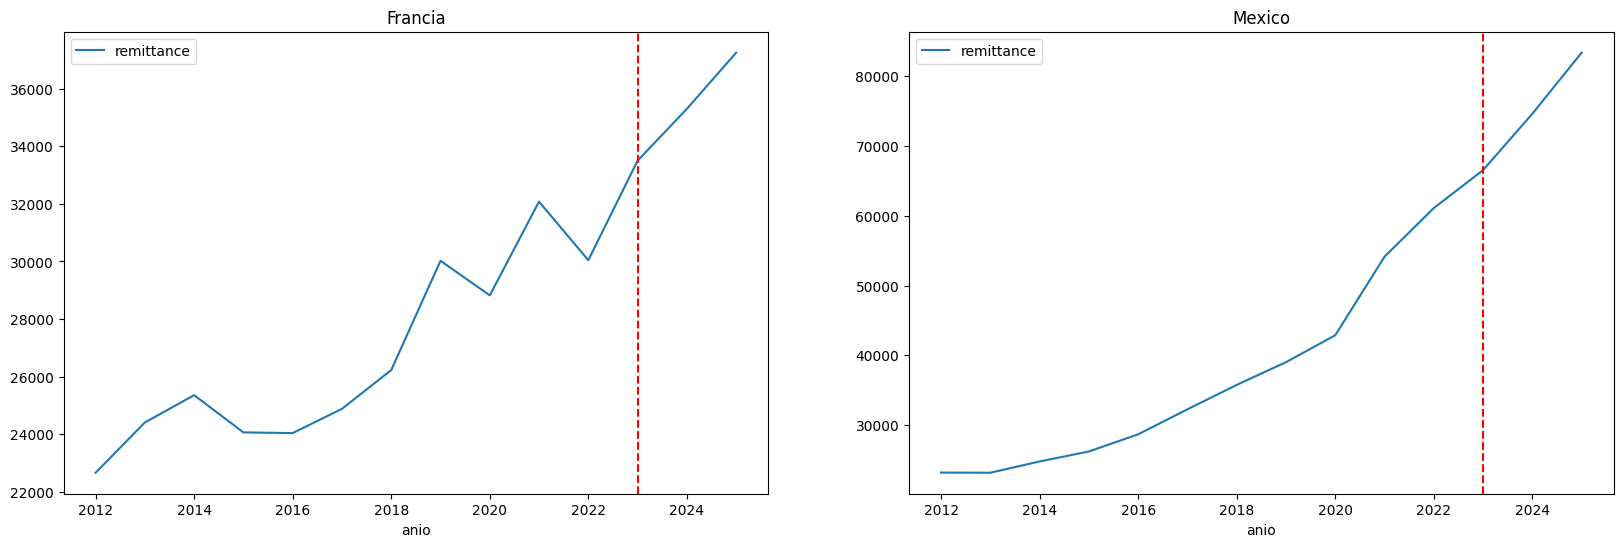

In [12]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
df_fra.plot(kind = "line", y=["remittance"], ax=axes[0], title='Francia')
df_mex.plot(kind = "line", y=["remittance"], ax=axes[1], title='Mexico')
for ax in axes:
    ax.axvline(x=2023, color='red', linestyle='--', label='Forecast')

plt.show()

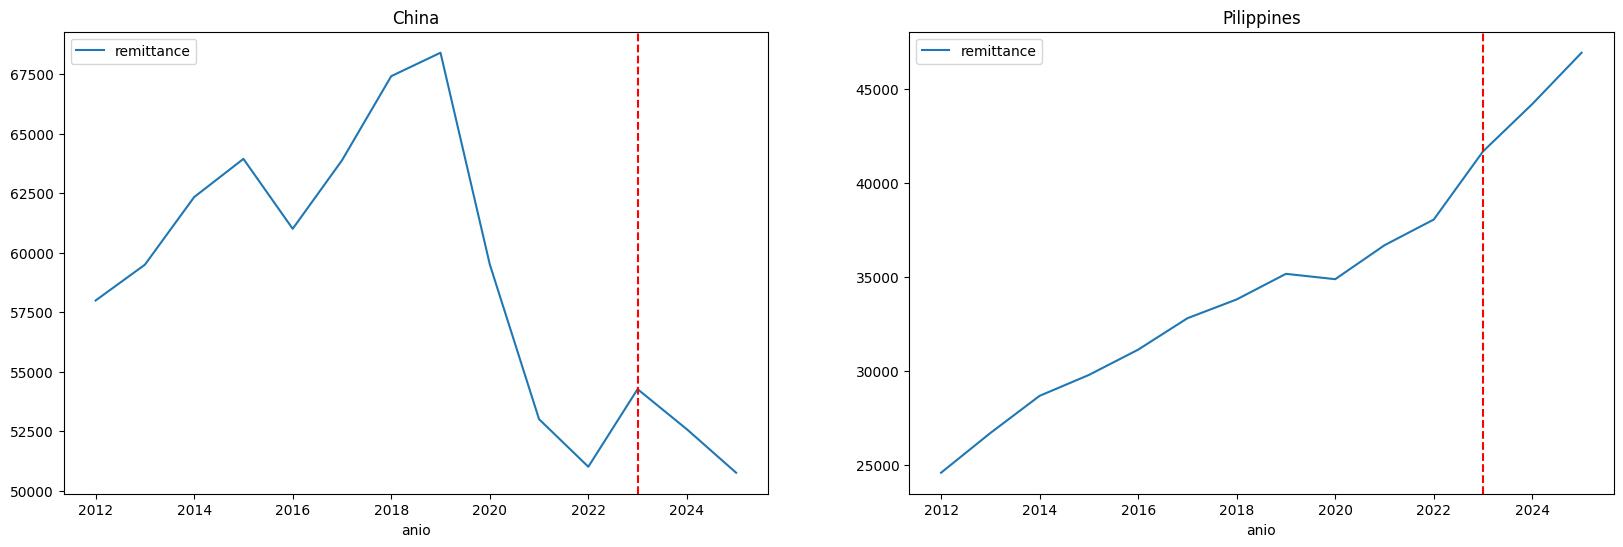

In [15]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
df_chi.plot(kind = "line", y=["remittance"], ax=axes[0], title='China')
df_phl.plot(kind = "line", y=["remittance"], ax=axes[1], title='Pilippines')
for ax in axes:
    ax.axvline(x=2023, color='red', linestyle='--', label='Forecast')

plt.show()

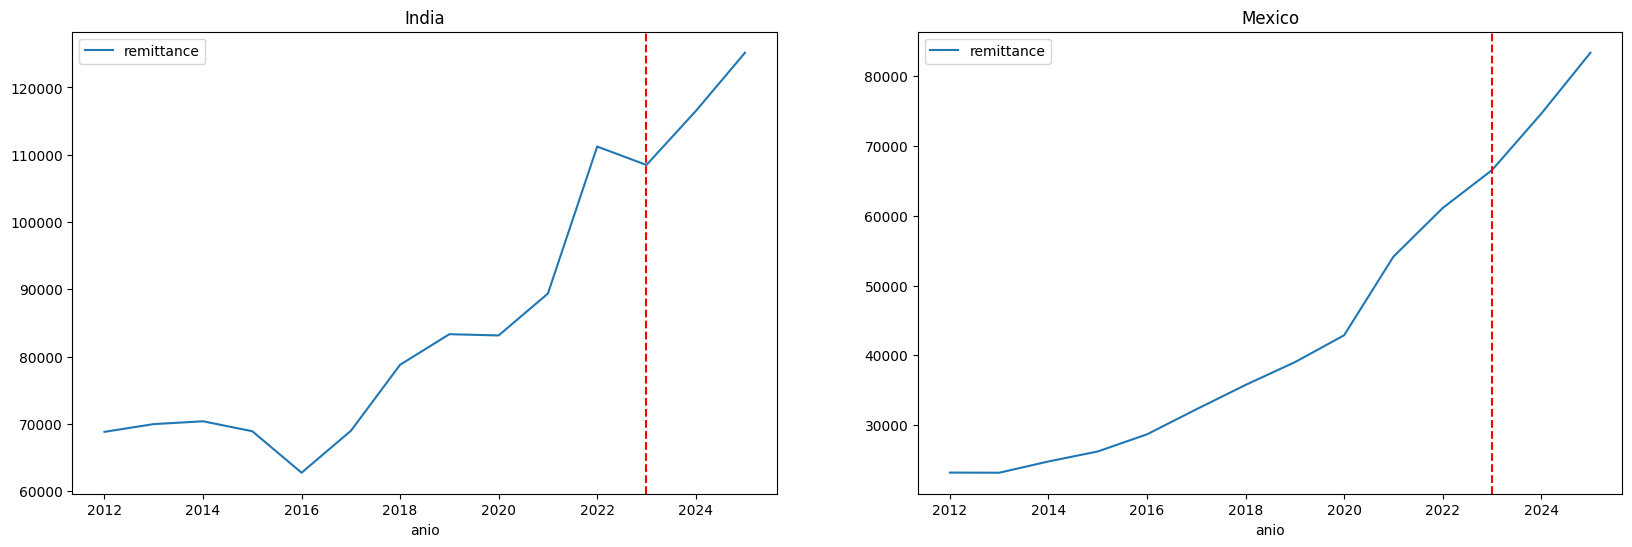

In [16]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
df_ind.plot(kind = "line", y=["remittance"], ax=axes[0], title='India')
df_mex.plot(kind = "line", y=["remittance"], ax=axes[1], title='Mexico')
for ax in axes:
    ax.axvline(x=2023, color='red', linestyle='--', label='Forecast')

plt.show()